# PART - 1

## Importing necessary libraries

In [205]:
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup

## Making a request to the website

In [206]:
source = requests.get('https://www.worldometers.info/coronavirus/')

## Creating a beautiful soup object

In [207]:
soup  = BeautifulSoup(source.content, features= 'html.parser')

## Scraping the information step by step

1. Identifying the required table:

In [208]:
table = soup.find(id = "main_table_countries_today")

---
2. get the information row wise since there doesnt seem to be unique class for each column.

In [209]:
thead = table.find('thead')

In [210]:
th = thead.find_all('th')

---
3. Get the tbodies and from there extract info about each row

In [211]:
tbody = table.find('tbody')

In [212]:
row_info = tbody.find_all('tr')

In [213]:
row_info = row_info[8:]

---
4. By inspecting we understand the required columns as : 1,2,4,12,14

In [214]:
def create_df(x):
  """
  This function takes in the beautiful soup object of the table body and returns the dataframe with required information
  """
  #creating a disctionary to store the required values row wise:
  dic = {
      'country' : [],
      'cases': [],
      'deaths': [],
      'tests' : [],
      'population':[]
  }
  
  #loop to find all the column values: 
  for row in x:
    r = row.find_all('td')

    #country name:
    dic['country'].append(r[1].text)

    #total cases:
    a = r[2].text.strip()
    if a == 'N/A' or a == '':
      dic['cases'].append(None)
    else:
      dic['cases'].append(int(a.replace(',','')))
    
    #total deaths:
    a = r[4].text.strip()
    if a == 'N/A' or a == '':
      dic['deaths'].append(None)
    else:
      dic['deaths'].append(int(a.replace(',','')))
    
    #total test:
    a = r[12].text.strip()
    if a == 'N/A' or a ==  '':
      dic['tests'].append(None)
    else:
      dic['tests'].append(int(a.replace(',','')))
    
    #population:
    a = r[14].text.strip()
    if a == 'N/A' or a =='':
      dic['population'].append(None)
    else:
      dic['population'].append(int(a.replace(',','')))
    
  return pd.DataFrame(dic)

---
5. Creating the dataframe

In [215]:
data_df = create_df(row_info)
print(data_df.head())

   country      cases     deaths         tests    population
0      USA  105020461  1142981.0  1.163387e+09  3.348053e+08
1    India   44685257   530762.0  9.179870e+08  1.406632e+09
2   France   39595964   164791.0  2.714902e+08  6.558452e+07
3  Germany   38043874   167491.0  1.223324e+08  8.388360e+07
4   Brazil   36987682   698047.0  6.377617e+07  2.153536e+08


---
6. setting country as the index

In [216]:
data_df = data_df.set_index('country')
print(data_df.head())

             cases     deaths         tests    population
country                                                  
USA      105020461  1142981.0  1.163387e+09  3.348053e+08
India     44685257   530762.0  9.179870e+08  1.406632e+09
France    39595964   164791.0  2.714902e+08  6.558452e+07
Germany   38043874   167491.0  1.223324e+08  8.388360e+07
Brazil    36987682   698047.0  6.377617e+07  2.153536e+08


---
7. Dropping the columns with null values:

In [217]:
data_df = data_df.dropna()

In [218]:
print(data_df.shape)

(212, 4)


In [219]:
data_df.isnull().sum()

cases         0
deaths        0
tests         0
population    0
dtype: int64

As we can see, we have dropped all the null columns.

---
8. Converting the object types to integer

In [220]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, USA to China
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cases       212 non-null    int64  
 1   deaths      212 non-null    float64
 2   tests       212 non-null    float64
 3   population  212 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.3+ KB


In [221]:
data_df.deaths = data_df.deaths.astype(int)
data_df.tests = data_df.tests.astype(int)
data_df.population = data_df.population.astype(int)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [222]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, USA to China
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   cases       212 non-null    int64
 1   deaths      212 non-null    int64
 2   tests       212 non-null    int64
 3   population  212 non-null    int64
dtypes: int64(4)
memory usage: 8.3+ KB


---
9. total deaths = 0 /  total tests = 0

In [223]:
data_df[(data_df.tests ==0) | (data_df.deaths == 0)]

,cases,deaths,tests,population
country,,,,


This is becasue while creating the dataframe itself i have taken care of those cases.

---
10. Tests per case: 

In [224]:
data_df['test_per_case'] = data_df.tests/data_df.cases

<ipython-input-224-198cee0852a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['test_per_case'] = data_df.tests/data_df.cases


In [225]:
data_df.head()

,cases,deaths,tests,population,test_per_case
country,,,,,
USA,105020461,1142981,1163387226,334805269,11.077720
India,44685257,530762,917986992,1406631776,20.543397
France,39595964,164791,271490188,65584518,6.856512
Germany,38043874,167491,122332384,83883596,3.215561
Brazil,36987682,698047,63776166,215353593,1.724254


---
11. sorting the table:

In [226]:
#descending order:
data_df = data_df.sort_values(by = ['test_per_case'],ascending = False)

In [227]:
print(data_df.head(20))

                     cases  deaths      tests  population  test_per_case
country                                                                 
China               503302    5272  160000000  1448471400     317.900585
UAE                1051336    2348  199104417    10081785     189.382288
Turks and Caicos      6551      38     611527       39741      93.348649
Oman                399449    4628   25000000     5323993      62.586213
Bermuda              18791     159    1026742       61939      54.640094
Saudi Arabia        829041    9606   45121063    35844909      54.425611
Rwanda              133170    1468    5959042    13600464      44.747631
Denmark            3174758    8237  129185732     5834950      40.691521
Bhutan               62611      21    2303734      787941      36.794397
Austria            5871234   21825  211273524     9066710      35.984518
Spain             13755956  119186  471036328    46719142      34.242355
Sierra Leone          7760     126     259958     8

In [228]:
#ascending order:
print(data_df.sort_values(by = ['test_per_case']).head(20))


                          cases  deaths     tests  population  test_per_case
country                                                                     
S. Korea               30458857   33887  15804065    51329899       0.518866
Algeria                  271428    6881    230861    45350148       0.850542
New Caledonia             79871     314     98964      290915       1.239048
Brazil                 36987682  698047  63776166   215353593       1.724254
Antigua and Barbuda        9106     146     18901       99509       2.075664
Vanuatu                   12014      14     24976      321832       2.078908
Slovenia                1326367    7067   2834333     2078034       2.136915
Macao                      3513     121      7850      667490       2.234557
Bolivia                 1192246   22362   2705422    11992656       2.269181
Micronesia                23671      60     54967      117489       2.322124
Eritrea                   10189     103     23693     3662244       2.325351

## Conclusion:

The country with the highest test per case is china and the country with the lowest test per case is north korea. It does not look like that the test_per_Case has any kind of effect in preventing the deaths, but lets plot some graphs to investigate this clearly.

In [229]:
df_low = data_df.sort_values(by = ['test_per_case']).head(20)
df_low['death_ratio'] = df_low.deaths/df_low.population
df_low

,cases,deaths,tests,population,test_per_case,death_ratio
country,,,,,,
S. Korea,30458857,33887,15804065,51329899,0.518866,0.000660
Algeria,271428,6881,230861,45350148,0.850542,0.000152
New Caledonia,79871,314,98964,290915,1.239048,0.001079
Brazil,36987682,698047,63776166,215353593,1.724254,0.003241
Antigua and Barbuda,9106,146,18901,99509,2.075664,0.001467
Vanuatu,12014,14,24976,321832,2.078908,0.000044
Slovenia,1326367,7067,2834333,2078034,2.136915,0.003401
Macao,3513,121,7850,667490,2.234557,0.000181
Bolivia,1192246,22362,2705422,11992656,2.269181,0.001865


In [230]:
df_high = data_df.sort_values(by = ['test_per_case'], ascending = False).head(20)
df_high['death_ratio'] = df_high.deaths/df_high.population
df_high

,cases,deaths,tests,population,test_per_case,death_ratio
country,,,,,,
China,503302,5272,160000000,1448471400,317.900585,0.000004
UAE,1051336,2348,199104417,10081785,189.382288,0.000233
Turks and Caicos,6551,38,611527,39741,93.348649,0.000956
Oman,399449,4628,25000000,5323993,62.586213,0.000869
Bermuda,18791,159,1026742,61939,54.640094,0.002567
Saudi Arabia,829041,9606,45121063,35844909,54.425611,0.000268
Rwanda,133170,1468,5959042,13600464,44.747631,0.000108
Denmark,3174758,8237,129185732,5834950,40.691521,0.001412
Bhutan,62611,21,2303734,787941,36.794397,0.000027


In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

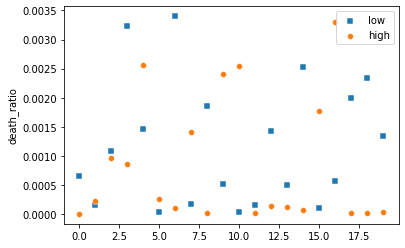

In [239]:
sns.scatterplot(x = np.arange(20), y = df_low.death_ratio, marker = 's')
sns.scatterplot(x = np.arange(20), y = df_high.death_ratio)
plt.legend(['low','high']);

In [233]:
df_high['death_per_case'] = df_high['deaths']/df_high['cases']
df_low['death_per_case'] = df_low['deaths']/df_low['cases']

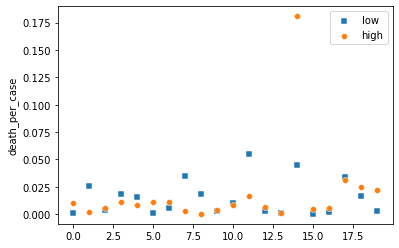

In [234]:
sns.scatterplot(x = np.arange(20), y = df_low.death_per_case, marker = 's')
sns.scatterplot(x = np.arange(20), y = df_high.death_per_case)
plt.legend(['low','high'])

In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [236]:
df = scaler.fit_transform(data_df)

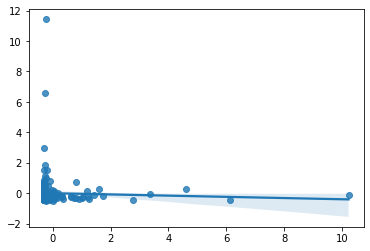

In [237]:
sns.regplot(x = df[:,1], y = df[:,4])

**No matter how I look at it, there doesn't seem to be much effect of increasing the tests done per a case in preventing the deaths.**